In [44]:
#Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
#Loading Dataset
data = pd.read_csv('Housing_dataset.csv')

In [46]:
#Printing dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [47]:
#Checking information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [48]:
#Checking Describsion of dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [49]:
#Checking for any NULL values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [50]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in binary_columns:
    data[column] = data[column].map({'yes': 1, 'no': 0})

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [51]:
#Extracting x and y
x=data.drop('parking',axis=1)
y=data['price']

In [52]:
#Extracting features of x 
x_fea=data[['area','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','area',]]
y=data['price']

In [53]:
#Display x features
x_fea

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area
0,7420,1,0,0,0,1,1,7420
1,8960,1,0,0,0,1,0,8960
2,9960,1,0,1,0,0,1,9960
3,7500,1,0,1,0,1,1,7500
4,7420,1,1,1,0,1,0,7420
...,...,...,...,...,...,...,...,...
540,3000,1,0,1,0,0,0,3000
541,2400,0,0,0,0,0,0,2400
542,3620,1,0,0,0,0,0,3620
543,2910,0,0,0,0,0,0,2910


In [54]:
#Data Splitting
x_train,x_test,y_train,y_test=train_test_split(x_fea,y,test_size=0.2,random_state=42)

In [55]:
#Setting up model
model = LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression()

In [57]:
#Predictions on dataset
y_pred=model.predict(x_test)

In [58]:
#Calculating terms
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [59]:
#Displaying values of calculations
print(f"mean_absolute_error={mae:.2f}")
print(f"mean_squared_error={mse:.2f}")
print(f"r2_score={r2:.2f}")

mean_absolute_error=1235032.61
mean_squared_error=2694405614337.62
r2_score=0.47


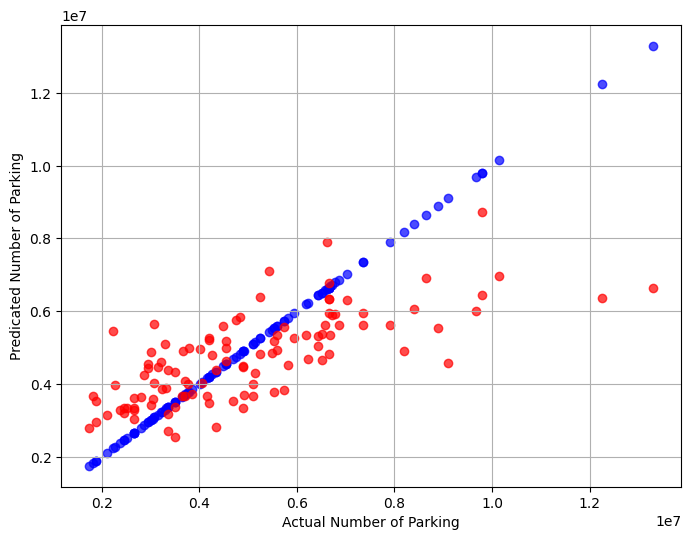

In [61]:
#Plotting the Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,color='blue',alpha=0.7,label='Actual Number of Parking')
plt.scatter(y_test,y_pred,color="Red",alpha=0.7,label='Predicated Number of Parking')
plt.xlabel("Actual Number of Parking")
plt.ylabel("Predicated Number of Parking")
plt.grid(True)
plt.show()